# Read data (with splitted date)

In [1]:
import pandas as pd
import numpy as np

april_data = pd.read_csv('/media/hoangbaoan1901/4F44EC2A29F10E55/information-systems_UET/BTL_AI/INT3401-Midterm/LSTM_implementation/data/weather_data_4.csv')
october_data = pd.read_csv('/media/hoangbaoan1901/4F44EC2A29F10E55/information-systems_UET/BTL_AI/INT3401-Midterm/LSTM_implementation/data/weather_data_10.csv')



# Date time conversion
april_data['date'] = pd.to_datetime(april_data['date'], format='%Y-%m-%d %H:%M:%S')
october_data['date'] = pd.to_datetime(october_data['date'], format='%Y-%m-%d %H:%M:%S')

# Sort by (date, row, col)
april_data = april_data.sort_values(by=['date', 'row', 'col'])
october_data = october_data.sort_values(by=['date', 'row', 'col'])


<Axes: >

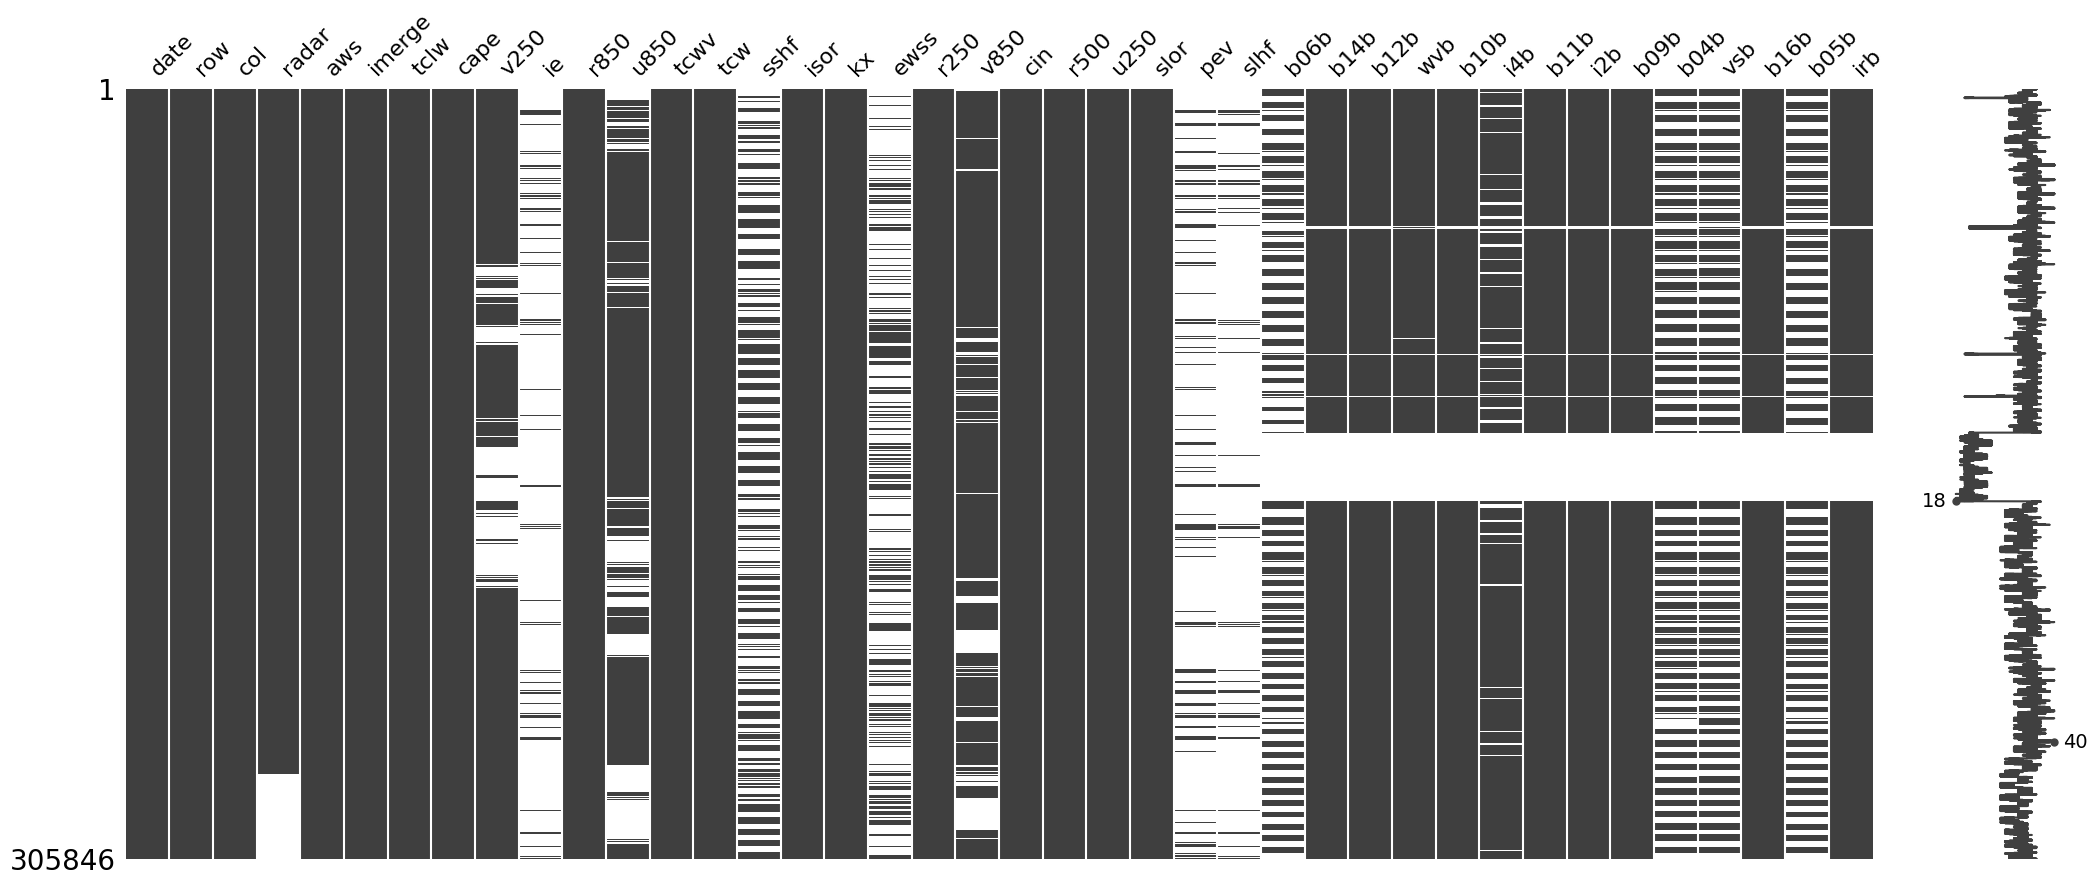

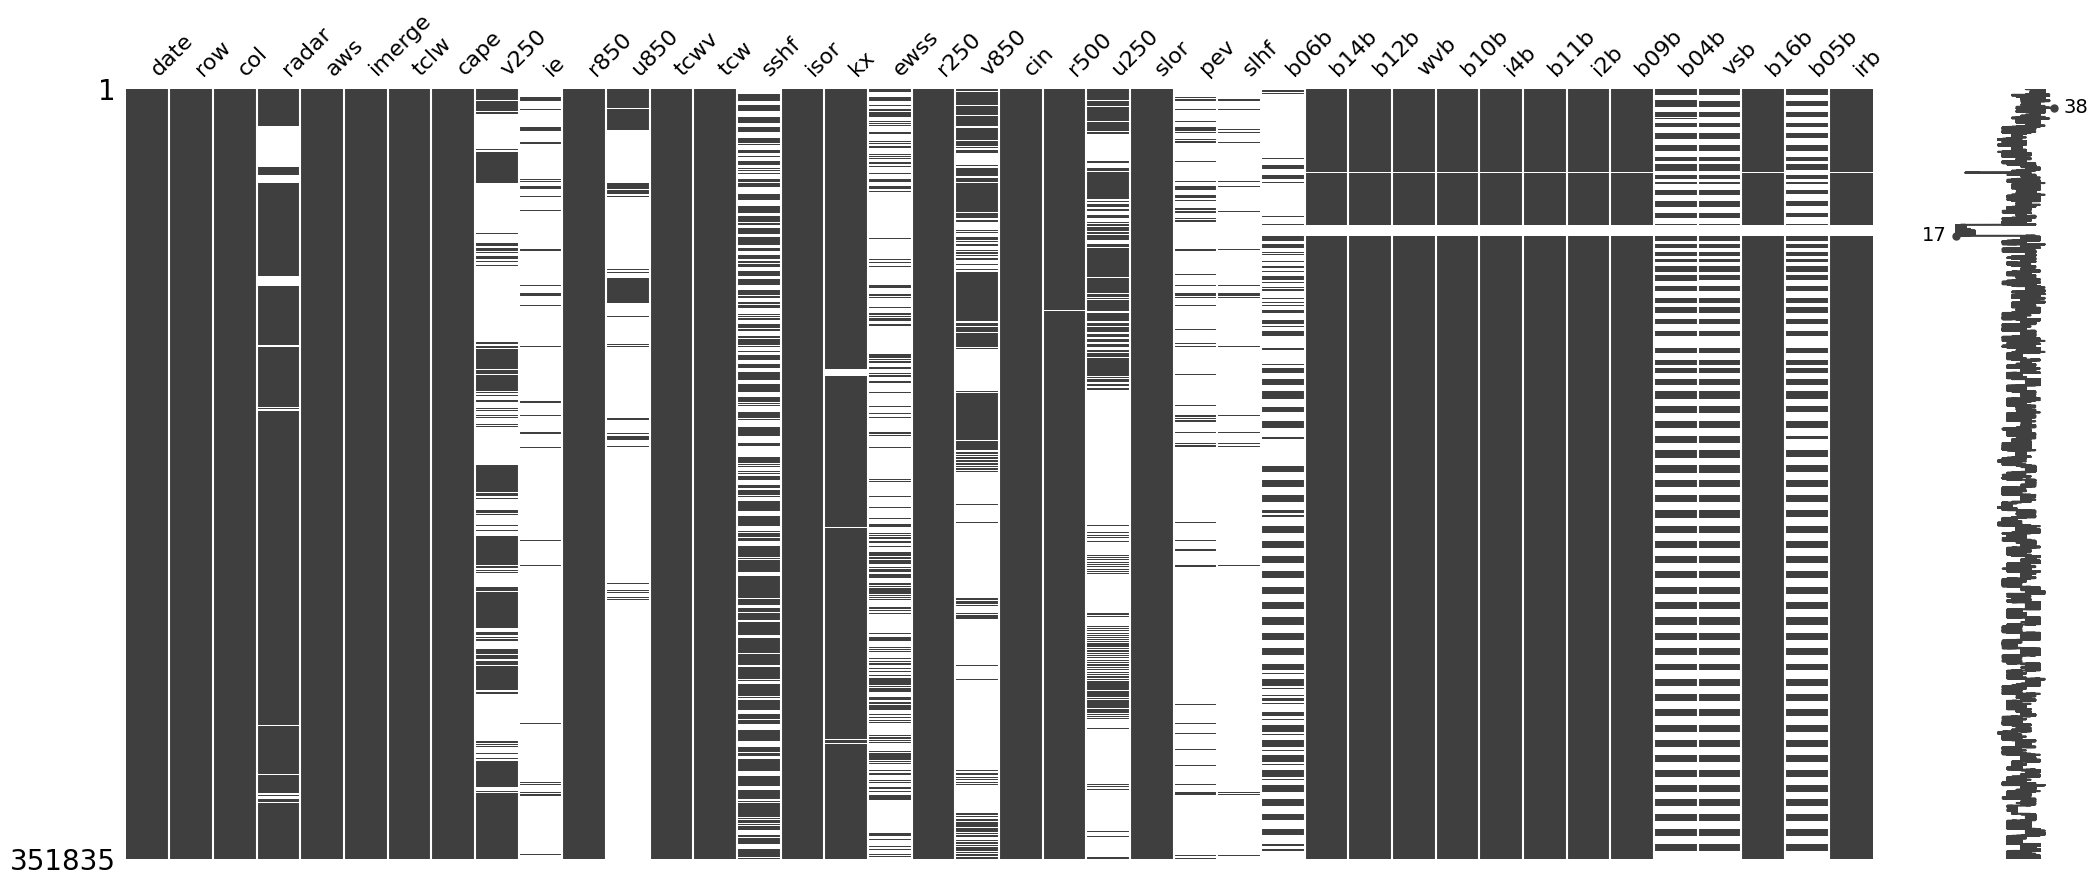

In [2]:
import missingno as msno
msno.matrix(april_data)
msno.matrix(october_data)

## Drop columns with more than 10% missing data

<Axes: >

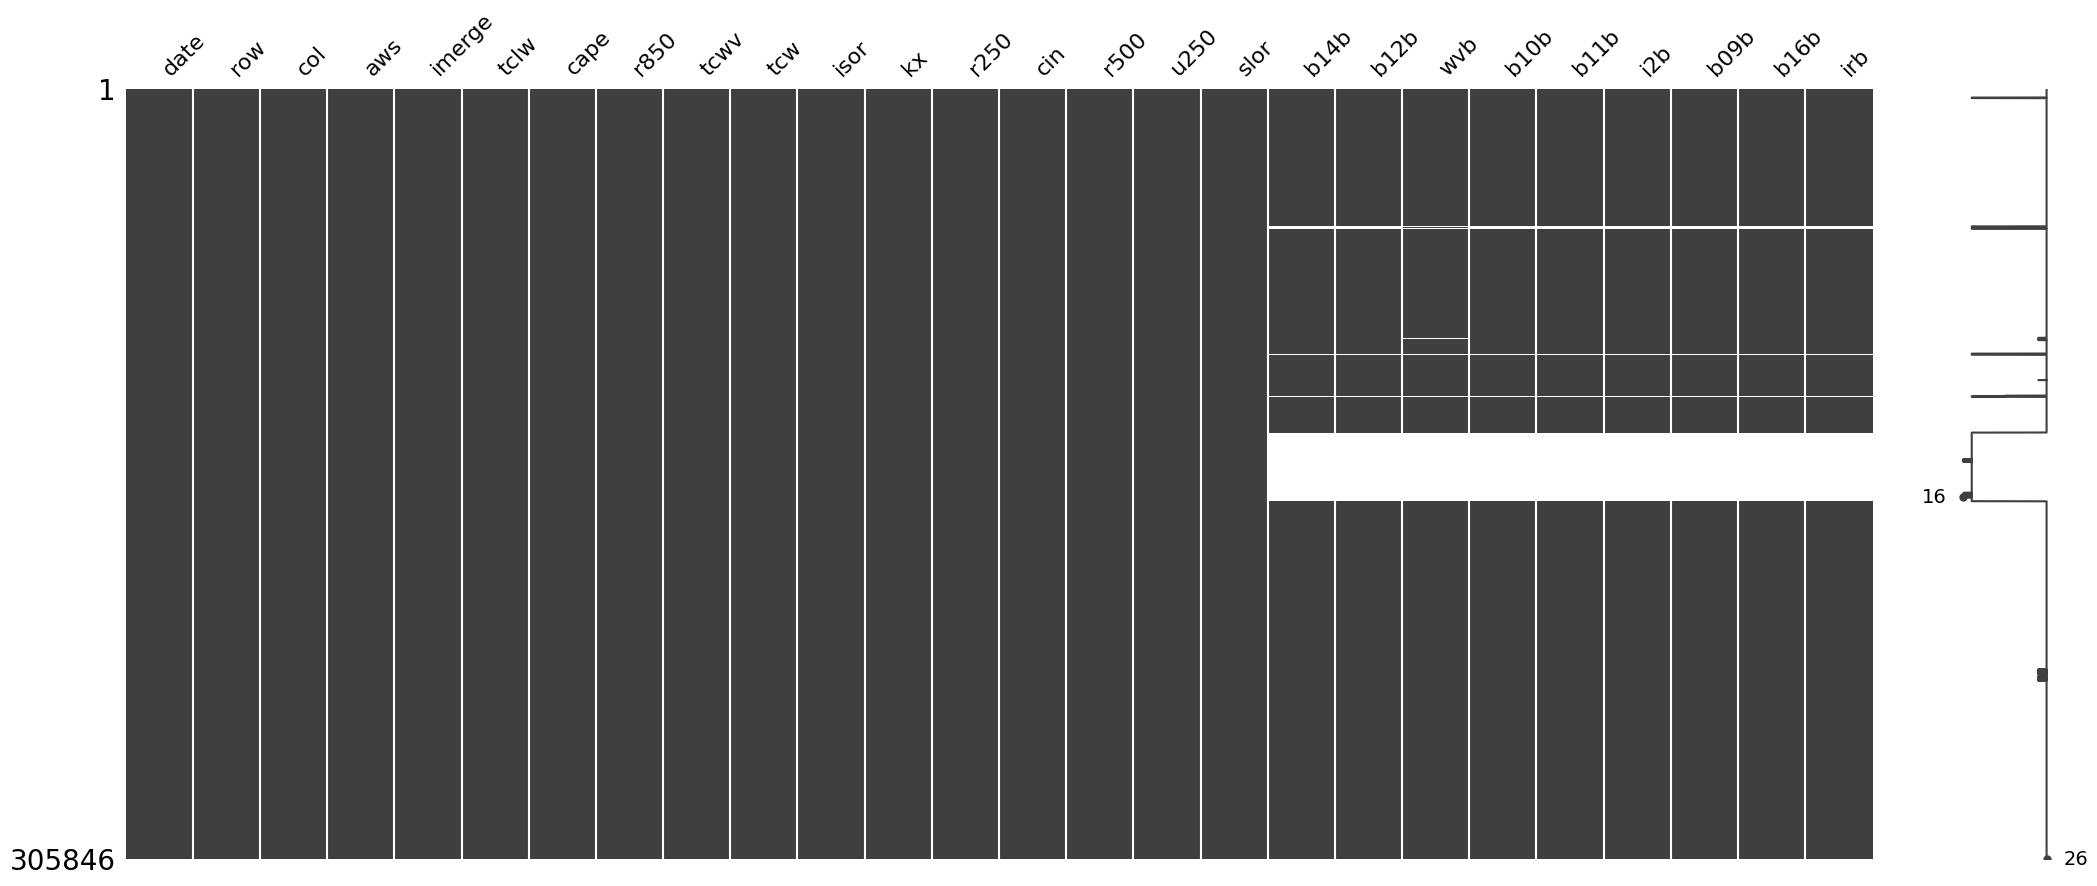

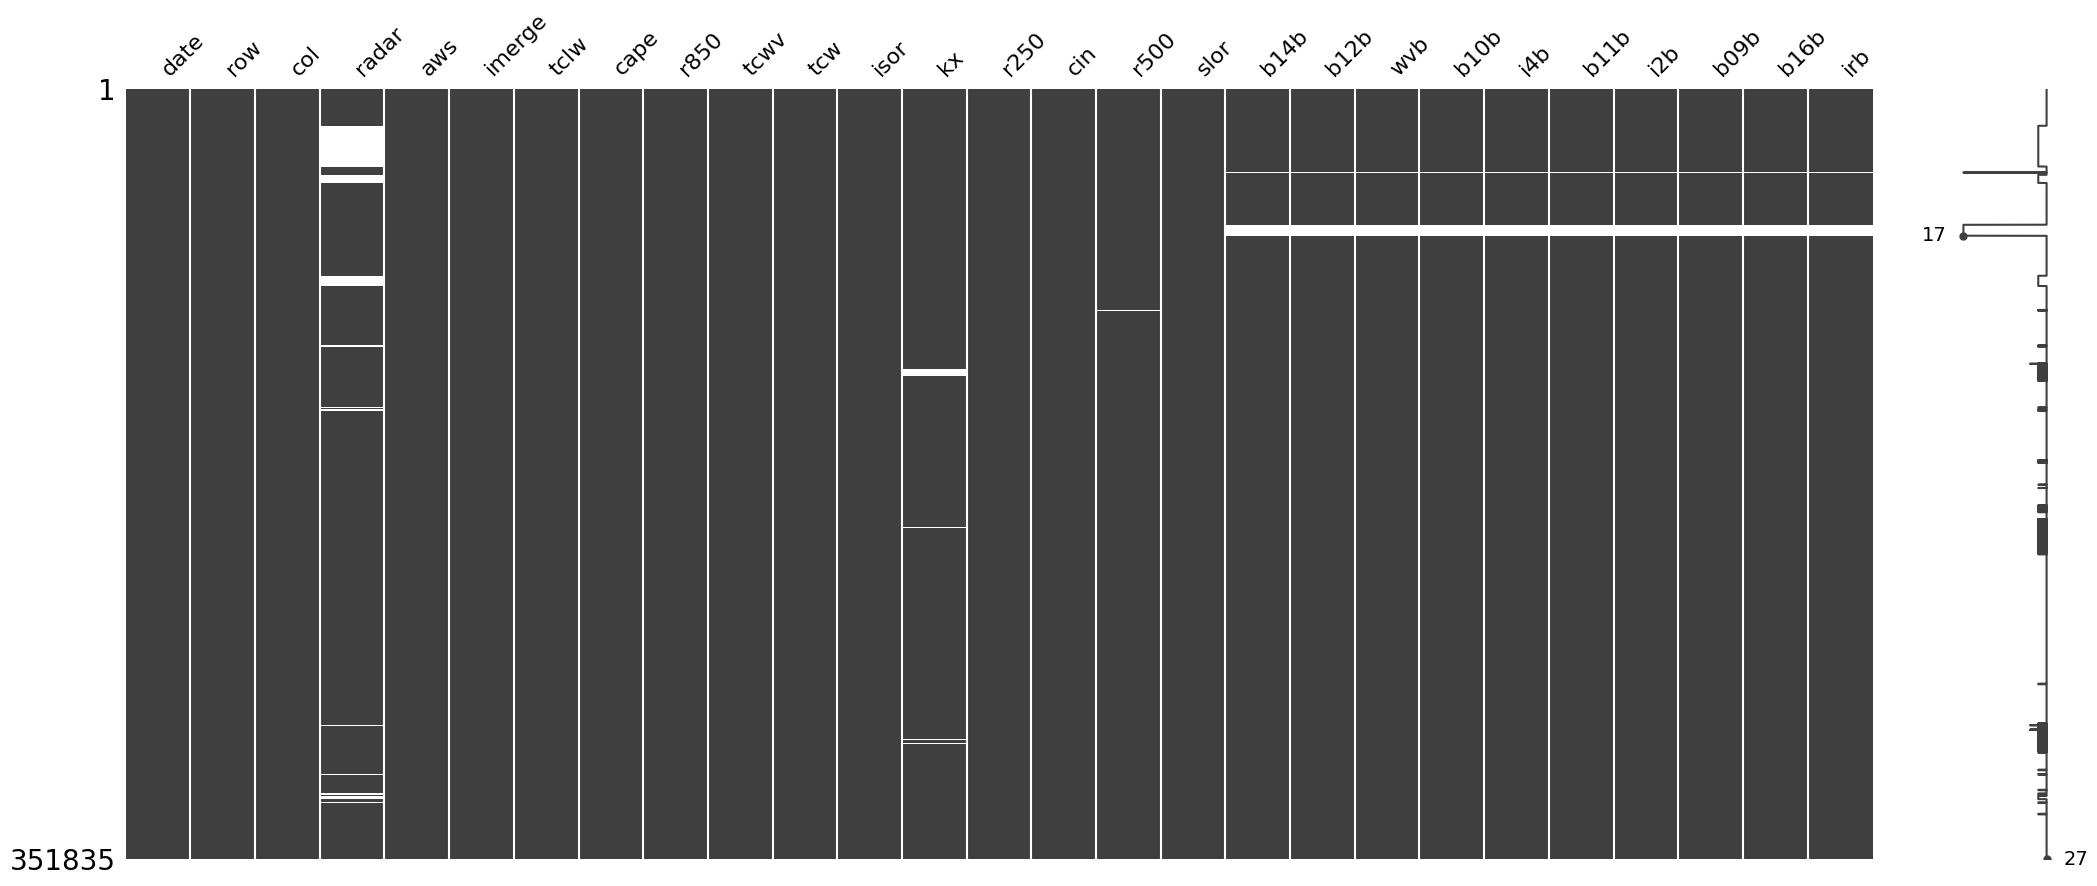

In [3]:

april_data = april_data.dropna(thresh=0.9*len(april_data), axis=1)
october_data = october_data.dropna(thresh=0.9*len(october_data), axis=1)

msno.matrix(april_data)
msno.matrix(october_data)

In [4]:
april_null = april_data.isnull().sum()
october_null = october_data.isnull().sum()

In [5]:
print(april_null)

date          0
row           0
col           0
aws           0
imerge        0
tclw          0
cape          0
r850          0
tcwv          0
tcw           0
isor          0
kx          121
r250         44
cin           0
r500          0
u250         22
slor          0
b14b      29178
b12b      28939
wvb       29655
b10b      28939
b11b      28939
i2b       29178
b09b      28939
b16b      29178
irb       29178
dtype: int64


In [6]:
print(october_null)

date          0
row           0
col           0
radar     33071
aws           0
imerge        0
tclw          0
cape          0
r850          0
tcwv          0
tcw           0
isor          0
kx         6704
r250         54
cin           0
r500         10
slor          0
b14b       5289
b12b       5289
wvb        5289
b10b       5289
i4b        5289
b11b       5289
i2b        5289
b09b       5289
b16b       5289
irb        5289
dtype: int64


### Drop rows with missing data

In [7]:
april_data = april_data.dropna()
october_data = october_data.dropna()

In [8]:
print(april_data.shape)
print(october_data.shape)

(275836, 26)
(306747, 27)


# K-means clusterr for geographic coord

In [9]:
import csv
points = []

csv_reader = csv.reader(open("/media/hoangbaoan1901/4F44EC2A29F10E55/information-systems_UET/BTL_AI/INT3401-Midterm/LSTM_implementation/data/aws_non-null_counts.csv"))
next(csv_reader)
for row in csv_reader:
	points.append([int(row[0]), int(row[1])]) # row, col

In [10]:
# Convert points to numpy array
points = np.array(points)
points.shape

(334, 2)

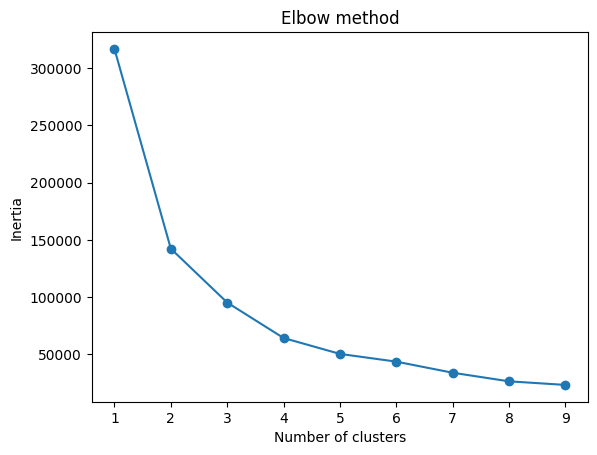

In [11]:
# K-means clustering
from sklearn.cluster import KMeans
n_means = range(1, 10)
# Elbow method for finding the optimal number of clusters
inertia = []
for n in n_means:
	kmeans = KMeans(n_clusters=n)
	kmeans.fit(points)
	inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(n_means, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()

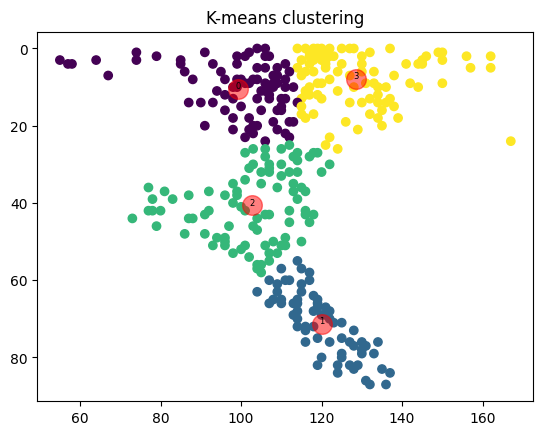

In [12]:
# Select 4 clusters
N_CLUSTERS = 4
kmeans = KMeans(n_clusters=N_CLUSTERS)
kmeans.fit(points)
labels = kmeans.predict(points)

# Plot the clusters
plt.scatter(points[:, 1], points[:, 0], c=labels, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='red', s=200, alpha=0.5)
for i, center in enumerate(centers):
	plt.text(center[1], center[0], str(i), fontsize=6, color='black', ha='center')
plt.gca().invert_yaxis()
plt.title('K-means clustering')
plt.show()

In [13]:
# For dataframes, add a new column for the cluster label
april_data['cluster_no'] = kmeans.predict(april_data[['row', 'col']])
october_data['cluster_no'] = kmeans.predict(october_data[['row', 'col']])

/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [14]:
april_data.head()

,date,row,col,aws,imerge,tclw,cape,r850,tcwv,tcw,...,b14b,b12b,wvb,b10b,b11b,i2b,b09b,b16b,irb,cluster_no
140148,2019-04-01,0,114,0.0,0.0,0.723206,446.125,94.882190,48.219376,49.239563,...,285.00070,260.33334,244.27534,261.63812,281.48710,281.76694,253.87752,269.99298,285.24005,3
140149,2019-04-01,0,116,0.0,0.0,0.581421,624.125,93.651720,48.055313,48.919250,...,282.17892,259.01260,244.05240,261.10180,279.65836,279.95640,253.48486,268.44498,282.48993,3
140150,2019-04-01,0,118,0.0,0.0,0.581421,624.125,93.651720,48.055313,48.919250,...,284.34457,260.33664,243.55762,261.10180,281.48782,281.68080,253.62572,269.33520,284.50903,3
140151,2019-04-01,0,119,0.0,0.0,0.581421,624.125,93.651720,48.055313,48.919250,...,283.88354,259.73105,243.33647,261.10593,280.73180,280.94617,253.06673,269.33356,284.15130,3
140152,2019-04-01,0,122,0.0,0.0,0.420837,646.875,91.843124,46.242813,46.876280,...,283.85870,259.61038,242.84953,260.70062,280.29822,280.34543,252.52501,268.99704,284.39117,3


In [15]:
october_data.head()

,date,row,col,radar,aws,imerge,tclw,cape,r850,tcwv,...,b12b,wvb,b10b,i4b,b11b,i2b,b09b,b16b,irb,cluster_no
214057,2019-10-01,0,114,0.0,0.0,0.0,0.004547,0.0,60.385710,36.165040,...,265.72513,241.02364,260.33590,294.75810,290.43625,289.84705,251.07793,274.01373,293.31912,3
214058,2019-10-01,0,116,0.0,0.0,0.0,0.004303,0.0,46.131805,33.653320,...,265.99994,241.13347,260.78625,295.00598,290.69717,290.15073,251.22456,274.45334,293.65903,3
214059,2019-10-01,0,118,0.0,0.0,0.0,0.004303,0.0,46.131805,33.653320,...,266.09207,241.23950,260.78625,295.41280,290.95596,290.37717,251.22456,274.53990,293.86304,3
214060,2019-10-01,0,125,0.0,0.0,0.0,0.003571,0.0,41.756805,32.791992,...,266.18417,242.19353,261.22668,295.12555,291.02097,290.90717,251.80103,274.88650,294.06567,3
214061,2019-10-01,0,127,0.0,0.0,0.0,0.003571,0.0,41.756805,32.791992,...,266.18417,242.29485,261.22668,295.20813,291.08597,290.90717,252.07686,274.97318,294.13367,3


## Rain level visualiziation

In [16]:
def count_rain_levels(data, month_name):
	conditions = {
		'No Rain': (data['aws'] <= 0.5),
		'Light Rain': (data['aws'] > 0.5) & (data['aws'] < 2.5),
		'Moderate Rain': (data['aws'] >= 2.5) & (data['aws'] <= 7.6),
		'Heavy Rain': (data['aws'] > 7.6) & (data['aws'] <= 50),
		'Severe Storm': (data['aws'] > 50) & (data['aws'] <= 100),
		'Tropical Storm': (data['aws'] > 100)
	}

	rain_stats = pd.DataFrame()

	for label, condition in conditions.items():
		count_by_cluster = data[condition].groupby('cluster_no').size()
		rain_stats[label] = count_by_cluster

	rain_stats = rain_stats.fillna(0).astype(int)
	print(f"{month_name} rain statistics per cluster:")
	print(rain_stats)
	return rain_stats

rain_stats_april = count_rain_levels(april_data, "April")
print("=" * 50)
rain_stats_october = count_rain_levels(october_data, "October")


April rain statistics per cluster:
            No Rain  Light Rain  Moderate Rain  Heavy Rain  Severe Storm  \
cluster_no                                                                 
0             63395        1436            679         236             0   
1             45030        1243            336         222            25   
2             60323         862            263         127             3   
3             99042        1729            581         297             0   

            Tropical Storm  
cluster_no                  
0                        0  
1                        6  
2                        1  
3                        0  
October rain statistics per cluster:
            No Rain  Light Rain  Moderate Rain  Heavy Rain  Severe Storm  \
cluster_no                                                                 
0             70108        4572           2114         761             4   
1             38875        6759           5048        3438           

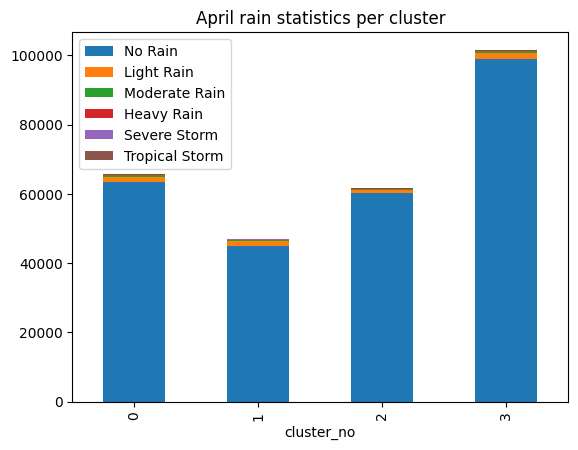

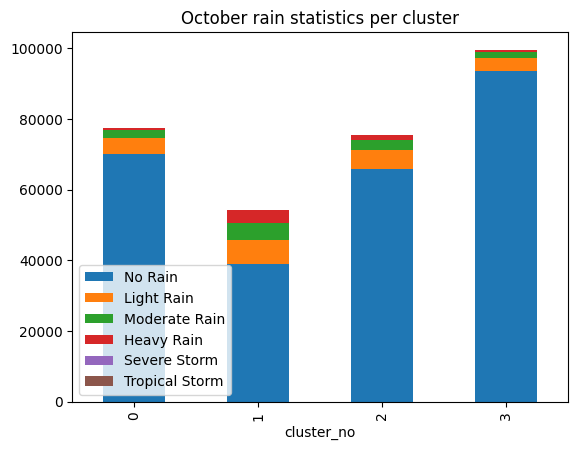

In [17]:
# Plot the rain statistics per cluster using a stacked bar chart
rain_stats_april.plot(kind='bar', stacked=True)
plt.title('April rain statistics per cluster')
plt.show()

rain_stats_october.plot(kind='bar', stacked=True)
plt.title('October rain statistics per cluster')
plt.show()


# Process data
## Create dataframes for each (cluster, row, col) combination
Trong phần này, mình sẽ chia các dataframes như sau
- Tạo 2 list cho tháng 4 và tháng 10
- Với mỗi cluster, đi tìm tổ hợp (row, col) sao cho các dataframe thuộc (cluster_no, row, col) không rỗng
	- Tập không rỗng sẽ được nhét vào một map với key là tuple(row, col) và value là dataframe ứng với tổ hợp đó

Nói chung là:
april_dfs và octorber_dfs có 4 phần tử đại diện cho mỗi cluster. Mỗi phần tử đó là một dictionary với key là tổ hợp (row, col) và value là dataframe ứng với tổ hợp (cluster_no, row, col)

Lưu ý: Các dataframe con được sắp xếp theo thời gian và đã bỏ đi row, col và cluster_no rồi

In [18]:
april_dfs = []
october_dfs = []

for cluster_no in range(N_CLUSTERS):
	april_cluster = april_data[april_data['cluster_no'] == cluster_no]
	october_cluster = october_data[october_data['cluster_no'] == cluster_no]
	print(f"april_cluster_size: {april_cluster.shape}, october_cluster_size: {october_cluster.shape}")
	april_cluster_rc_df = dict()
	october_cluster_rc_df = dict()
	for row in range(90):
		for col in range(250):
			key = tuple([row, col])
			if not(april_cluster[(april_cluster['row'] == row) & (april_cluster['col'] == col)].empty):
				temp = april_cluster[(april_cluster['row'] == row) & (april_cluster['col'] == col)]
				temp = temp.sort_values(by=['date'])
				temp = temp.drop(columns=['cluster_no', 'row', 'col'])
				temp = temp.reset_index(drop=True)
				april_cluster_rc_df[key] = temp
			if not(october_cluster[(october_cluster['row'] == row) & (october_cluster['col'] == col)].empty):
				temp = october_cluster[(october_cluster['row'] == row) & (october_cluster['col'] == col)]
				temp = temp.drop(columns=['cluster_no', 'row', 'col'])
				temp = temp.sort_values(by=['date'])
				temp = temp.reset_index(drop=True)
				october_cluster_rc_df[key] = temp
	april_dfs.append(april_cluster_rc_df)
	october_dfs.append(october_cluster_rc_df)


april_cluster_size: (65746, 27), october_cluster_size: (77559, 28)
april_cluster_size: (46862, 27), october_cluster_size: (54210, 28)
april_cluster_size: (61579, 27), october_cluster_size: (75392, 28)
april_cluster_size: (101649, 27), october_cluster_size: (99586, 28)


In [19]:
for i in range(N_CLUSTERS):
	print(f"Cluster {i}")
	print(f"April: {len(april_dfs[i])}, October: {len(october_dfs[i])}")

Cluster 0
April: 80, October: 83
Cluster 1
April: 59, October: 66
Cluster 2
April: 86, October: 89
Cluster 3
April: 95, October: 93


In [20]:
# Save the dataframes to pickle files
import pickle
data_path = "/media/hoangbaoan1901/4F44EC2A29F10E55/information-systems_UET/BTL_AI/INT3401-Midterm/LSTM_implementation/data/"
april_file = open(data_path + "april_cluster_row_col_dfs.pkl", "wb")
october_file = open(data_path + "october_cluster_row_col_dfs.pkl", "wb")
pickle.dump(april_dfs, april_file)
pickle.dump(october_dfs, october_file)
april_file.close()
october_file.close()